# Визуализация данных

Визуализация данных - первый шаг в решении практически любой задачи анализа данных, в частности, при участии в соревновании. Визуализация помогает решить, какую предобработку данных нужно провести, какие методы лучше использовать для предсказания, какие признаки добавить. В этом Peer Review мы будем работать с данными [kaggle-соревнования](https://www.kaggle.com/c/prudential-life-insurance-assessment), завершившегося зимой 2016 года.

__Задача соревнования:__ по характеристикам человека и его заявки на медицинскую страховку предсказать степень риска, характерную для данной страховки.

__Что предстоит сделать:__
* рассматривать данные;
* пробовать разные методы визуализации;
* анализировать графики и пытаться сделать выводы, полезные для следующих этапов решения задачи.

Целевой признак (степень риска) в задаче номинальный: целые числа от 1 до 8, а метрика качества, предложенная организаторами соревнования, оценивает степень согласованности двух рейтингов. Поэтому задачу можно решать и методами классификации, и методами регрессии (в последнем случае придется округлять предсказания). Это стоит учитывать при анализе результатов визуализации.

Мы будем визуализировать только обучающую выборку. Часто при решении конкурсов полезно визуализировать также тестовую выборку (на которой нужно сделать предсказание), чтобы убедиться, что данные идентичны.

Визуализацию в python часто делают с помощью библиотеки seaborn. Установить ее можно командой pip install seaborn. Если вы по каким-то причинам не можете установить библиотеку, вам придется строить некоторые графики самостоятельно или использовать их аналоги в pyplot. Pandas также использует seaborn, чтобы строить графики.

In [2]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn

Считываем данные:

In [3]:
data = pandas.read_csv("train.csv", na_values="NaN")

In [4]:
data.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [5]:
real_features = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                 "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
discrete_features = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
cat_features = data.columns.drop(real_features).drop(discrete_features).drop(["Id", "Response"]).tolist()

### Первичный анализ

In [6]:
good_discrete_and_real_features = []
half_known_features = []
for i, nans_count in data.isna().sum().items():
    is_cat = i in cat_features
    is_discrete = i in discrete_features
    is_real = i in real_features
    feature_type = 'cat' if is_cat else 'discrete' if is_discrete else 'real'
    print(f'{i} ({feature_type}): {nans_count} NaNs')
    if nans_count == 0 and (i in real_features or i in discrete_features):
        good_discrete_and_real_features.append(i)
    if (data.shape[0] - nans_count) < data.shape[0] / 2 and (i in real_features or i in discrete_features):
        half_known_features.append(i)
print()

print('Real and discrete features without NaNs:')
print(*good_discrete_and_real_features, sep='\n' )
print()
print('Features with less than half of values known:')
print(*half_known_features, sep='\n' )

Id (real): 0 NaNs
Product_Info_1 (cat): 0 NaNs
Product_Info_2 (cat): 0 NaNs
Product_Info_3 (cat): 0 NaNs
Product_Info_4 (real): 0 NaNs
Product_Info_5 (cat): 0 NaNs
Product_Info_6 (cat): 0 NaNs
Product_Info_7 (cat): 0 NaNs
Ins_Age (real): 0 NaNs
Ht (real): 0 NaNs
Wt (real): 0 NaNs
BMI (real): 0 NaNs
Employment_Info_1 (real): 19 NaNs
Employment_Info_2 (cat): 0 NaNs
Employment_Info_3 (cat): 0 NaNs
Employment_Info_4 (real): 6779 NaNs
Employment_Info_5 (cat): 0 NaNs
Employment_Info_6 (real): 10854 NaNs
InsuredInfo_1 (cat): 0 NaNs
InsuredInfo_2 (cat): 0 NaNs
InsuredInfo_3 (cat): 0 NaNs
InsuredInfo_4 (cat): 0 NaNs
InsuredInfo_5 (cat): 0 NaNs
InsuredInfo_6 (cat): 0 NaNs
InsuredInfo_7 (cat): 0 NaNs
Insurance_History_1 (cat): 0 NaNs
Insurance_History_2 (cat): 0 NaNs
Insurance_History_3 (cat): 0 NaNs
Insurance_History_4 (cat): 0 NaNs
Insurance_History_5 (real): 25396 NaNs
Insurance_History_7 (cat): 0 NaNs
Insurance_History_8 (cat): 0 NaNs
Insurance_History_9 (cat): 0 NaNs
Family_Hist_1 (cat): 0 N

In [7]:
print('Discrete features:')
for feature in discrete_features:
    min_value = data[feature].min()
    max_value = data[feature].max()
    print(min_value, max_value)
print()
print('Real features:')
for feature in real_features:
    min_value = data[feature].min()
    max_value = data[feature].max()
    print(min_value, max_value)

Discrete features:
0.0 240.0
0.0 240.0
0.0 240.0
0.0 240.0
0.0 240.0

Real features:
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.943661972
0.0 1.0


Сначала рассмотрим числовые признаки, затем - категориальные.

##### Выведем статистики вещественных и целочисленных признаков:

__Ответьте на вопросы:__
* Есть ли пропуски в данных? Перечислите вещественные и целочисленные признаки, которые известны для всех объектов.
   * Ответ:
      * Product_Info_4
      * Ins_Age
      * Ht
      * Wt
      * BMI
* Перечислите вещественные и целочисленные признаки, значение которых известно менее, чем для половины объектов.
   * Ответ:
      * Family_Hist_3
      * Family_Hist_5
      * Medical_History_10
      * Medical_History_15
      * Medical_History_24
      * Medical_History_32
* Одинаков ли масштаб вещественных признаков? Масштаб целочисленных признаков?
    * Ответ: среди вещественных признаков все минимумы одинаковы = 0, все максимумы одинаковы = 240, среди целочисленных, минимумы = 0, максимумы примерно = 1, за исключением одного, но он явно не отличается в два раза. Так что да, мастштаб одинаков.

$^*$ Будем считать, что масштаб двух признаков одинаков, если их минимумы отличаются не более, чем в 2 раза, и аналогично с максимумами.

Мы видим, что в датасете есть признаки, которые не известны почти для всех объектов. Кроме того, легко проверить, что в выборке нет объектов, для которых известны все признаки, даже если рассматривать только вещественные. Значит, при решении задачи нужно было бы использовать более сложные методы обработки пропусков, чем удаление объектов.

##### Постройте гистограммы вещественных и целочисленных признаков.
Вместо того, чтобы в цикле по признакам строить отдельно каждую гистограмму, стоит воспользоваться методом hist датафрейма. Рекомендуется отдельно вывести гистограммы вещественных и целочисленных признаков. Установите размер изображения (20, 20) для первой группы признаков и  (10, 10) для второй, для обеих групп bins=100.

array([[<Axes: title={'center': 'Medical_History_1'}>,
        <Axes: title={'center': 'Medical_History_10'}>],
       [<Axes: title={'center': 'Medical_History_15'}>,
        <Axes: title={'center': 'Medical_History_24'}>],
       [<Axes: title={'center': 'Medical_History_32'}>, <Axes: >]],
      dtype=object)

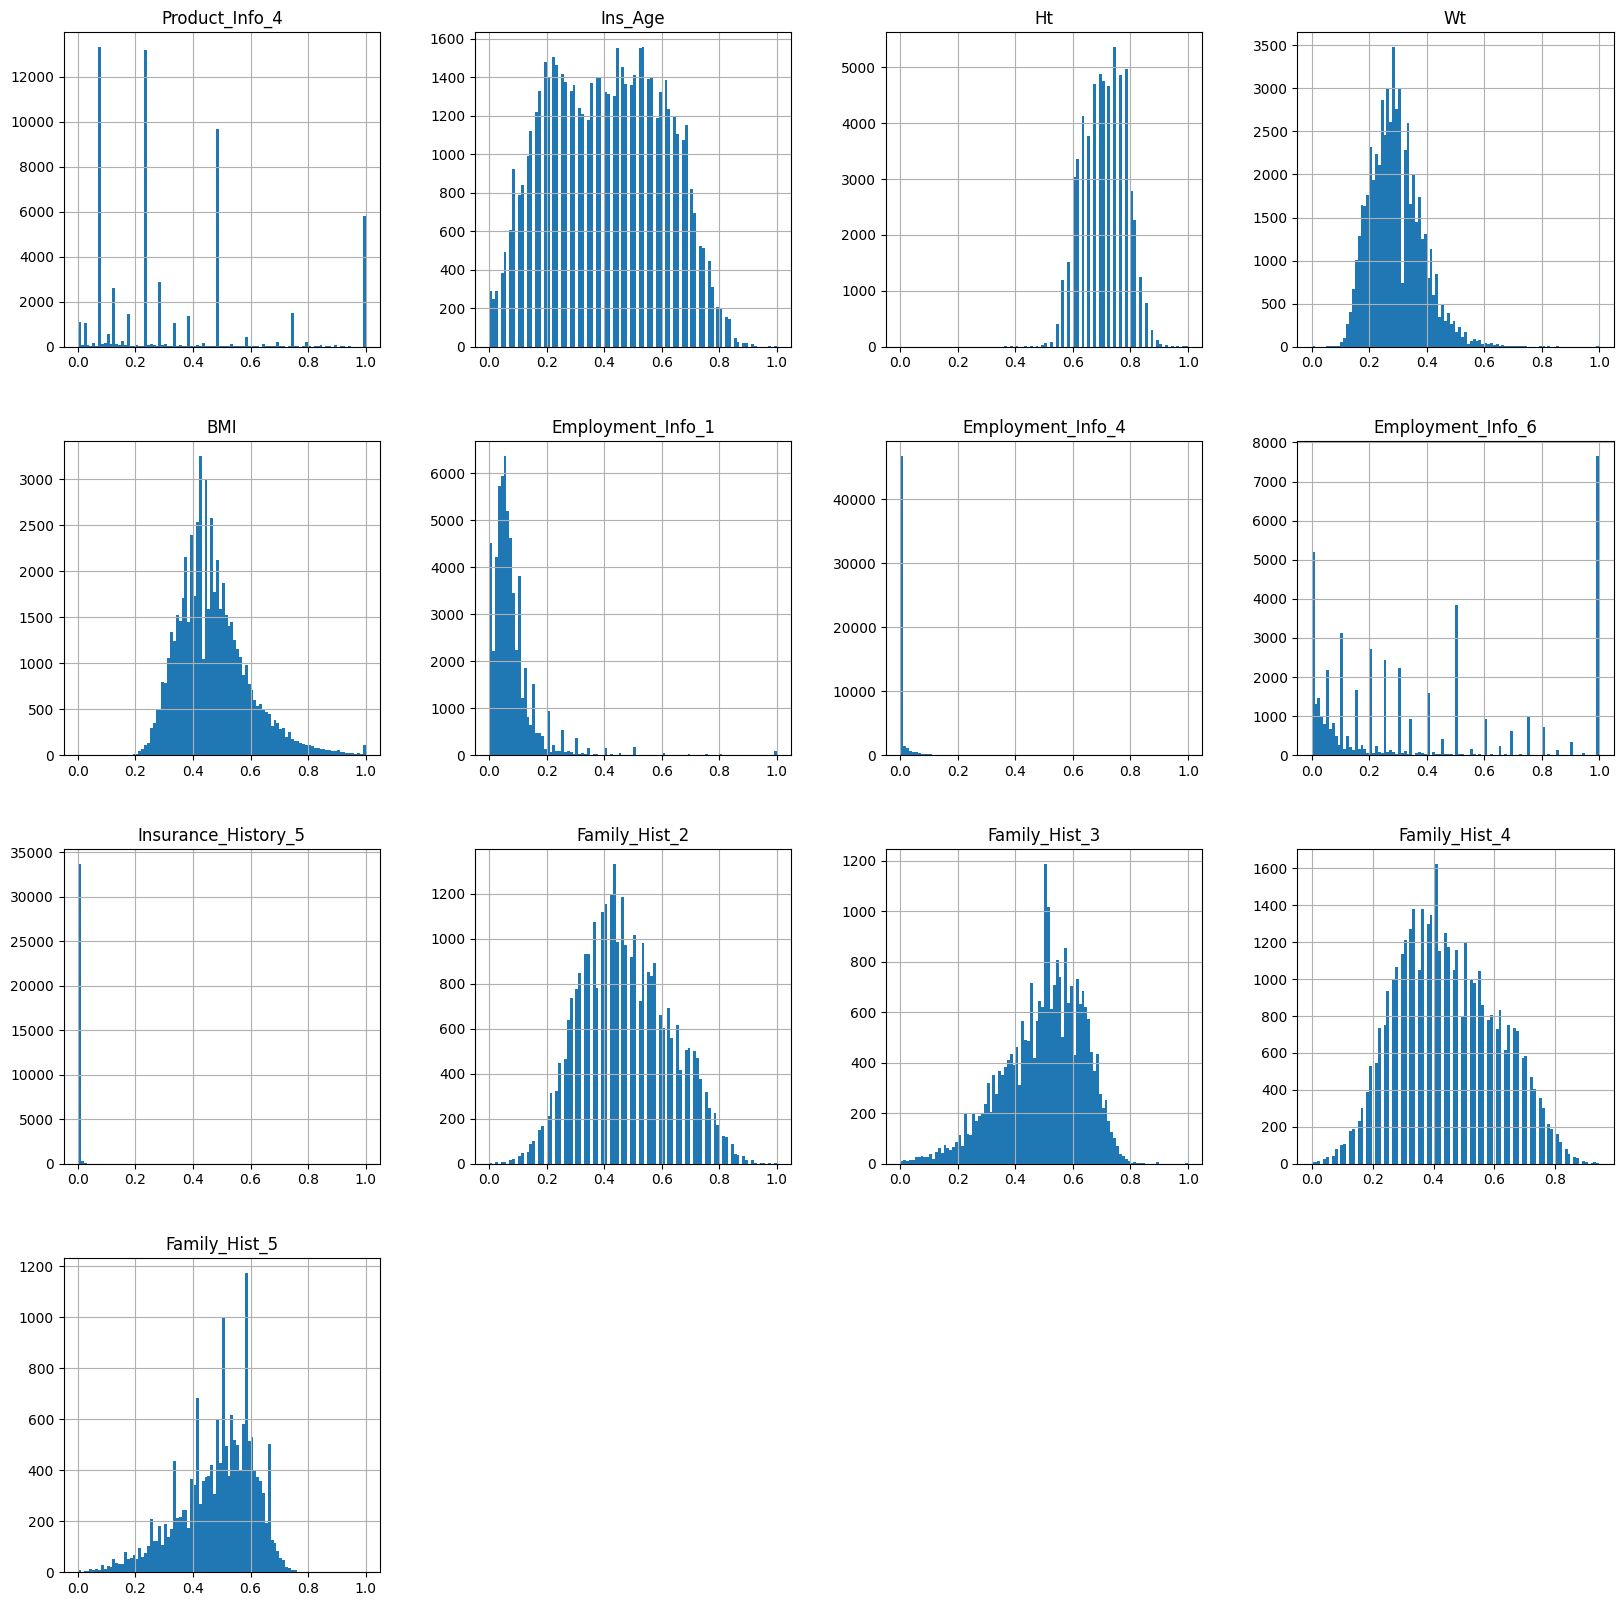

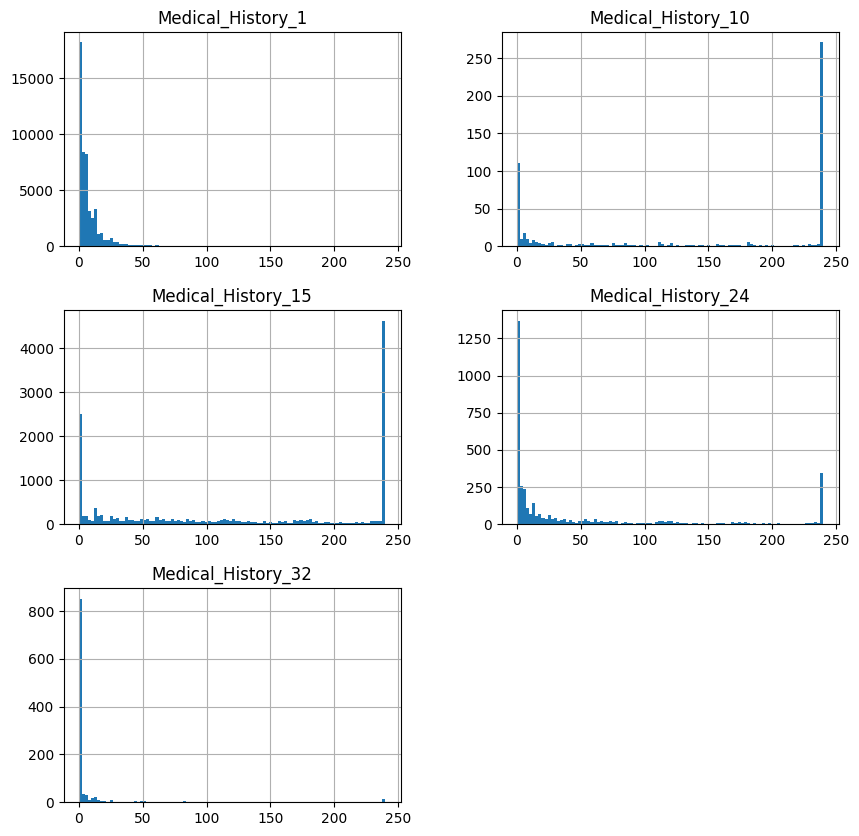

In [8]:
data.hist(column=real_features, bins=100, figsize=(20, 20))
data.hist(column=discrete_features, bins=100, figsize=(10, 10))

count    33985.000000
mean         0.001733
std          0.007338
min          0.000000
25%          0.000400
50%          0.000973
75%          0.002000
max          1.000000
Name: Insurance_History_5, dtype: float64


<Axes: >

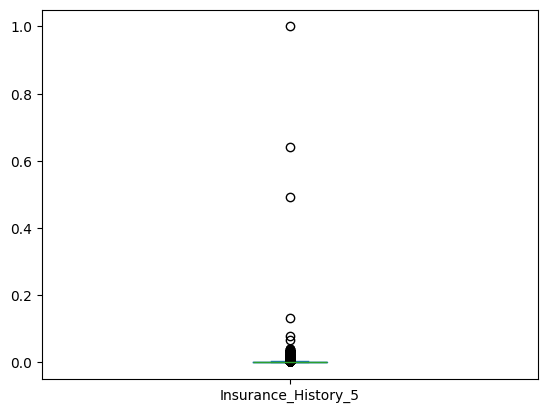

In [9]:
print(data['Insurance_History_5'].describe())
data['Insurance_History_5'].plot.box()

__Ответьте на вопросы:__
* Есть ли константные признаки среди вещественных и целочисленных? Признак является константным, если множество его значений состоит из единственного элемента.
    * Ответ: Нет. Хотя Insurance_History_5 похож на константу, но при дальнейшем изучении мы выдим, что это просто очень странное распределение около нуля с выборосами до единицы.
* Предположим, что мы составили выборку, в которую вошли все и только вещественные признаки. Можно ли ее описать многомерным нормальным распределением? $^*$
    * Ответ: Нет. Если бы можно было, мы бы на всех графиках видели красивые колокола, а видим только на некоторых.
    
$^*$
Плотность многомерного нормального распределения во всех проекциях на отдельные переменные должна быть симметрична, куполообразна, а значит, унимодальна.

Среди вещественных есть признаки с очень большим перекосом в сторону какого-то одного значения (например, Employmennt_Info_4), возможно, их стоило бы прологарифмировать при решении задачи. Кроме того, есть признаки со сложной структурой гистограммы.
Распределения целочисленных признаков (относящихся к группе медицинских) имеют схожую структуру.

В целом данные разнородны, и описать их одним вероятностным распределением непросто.

##### Теперь визуализируем признаки попарно.
Построим scatterplot для пар вещественных признаков. Для этого в seaborn есть функция pairplot. Исключим признаки, распределение которых не похоже на колокол (хотя бы скошенный и неровный), тем самым мы уменьшим размер таблицы пар. На диагоналях таблицы будут стоять оценки распределений признаков (гистограммы или восстановленные плотности, diag_kind="hist" или "kde"). Если указать параметр hue = дискретный целевой признак, то разные его значения будут отображаться разными цветами.

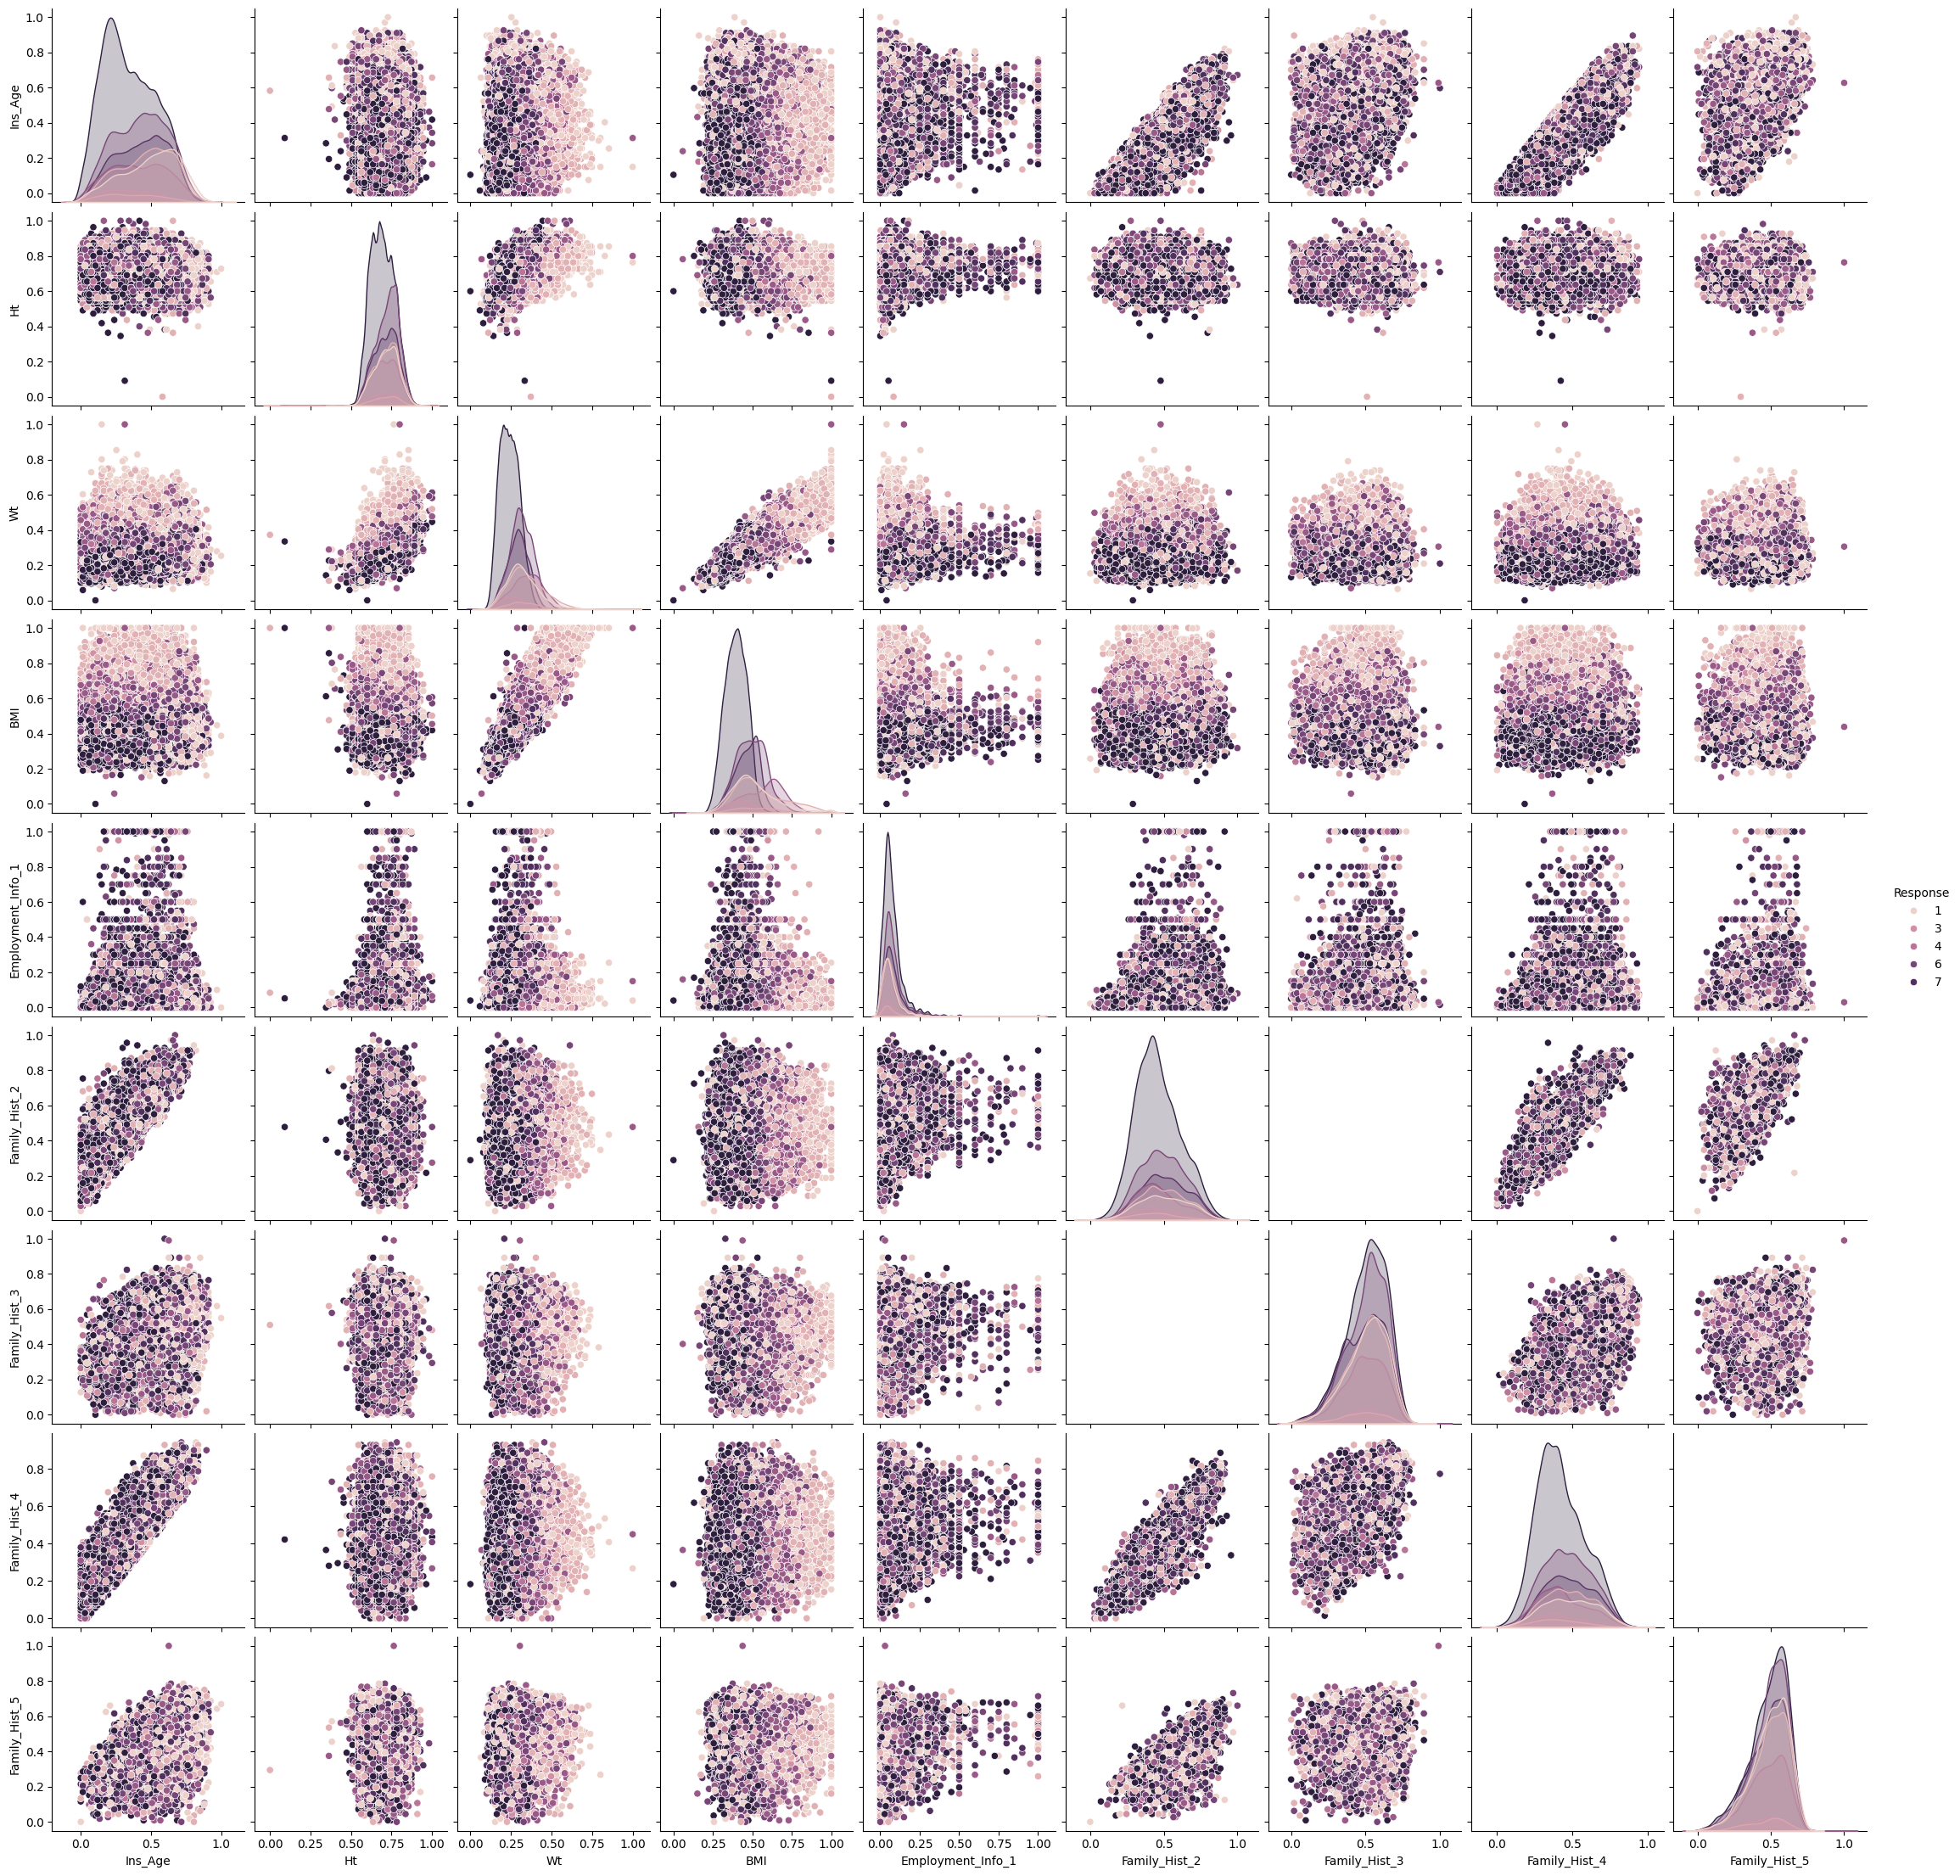

In [10]:
ugly_real_features = ['Product_Info_4', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5']
seaborn.pairplot(data, vars=[f for f in real_features if f not in ugly_real_features], hue='Response')

Классы накрывают друг друга, и графики не очень информативны. Но они позволяют ответить на некоторые вопросы о взаимоотношениях признаков и соотношений признаков и классов.

__Ответьте на вопросы:__
* Есть ли пары признаков, у которых облака точек разных классов отличаются? Иными словами, есть ли графики, на которых видны облака разных классов, а не только последнего нарисованного?
    * Ответ: нет).
* Есть ли объекты-выбросы, то есть такие точки, которые стоят далеко от общего облака точек?
    * Ответ: да).

В целом облака точек выглядят достаточно компактно (в неформальном понимании этого слова), их можно приблизить искривленным кругом.

Теперь постройте такие же графики для целочисленных признаков (никакие признаки удалять не нужно, потому что таких признаков и так немного).

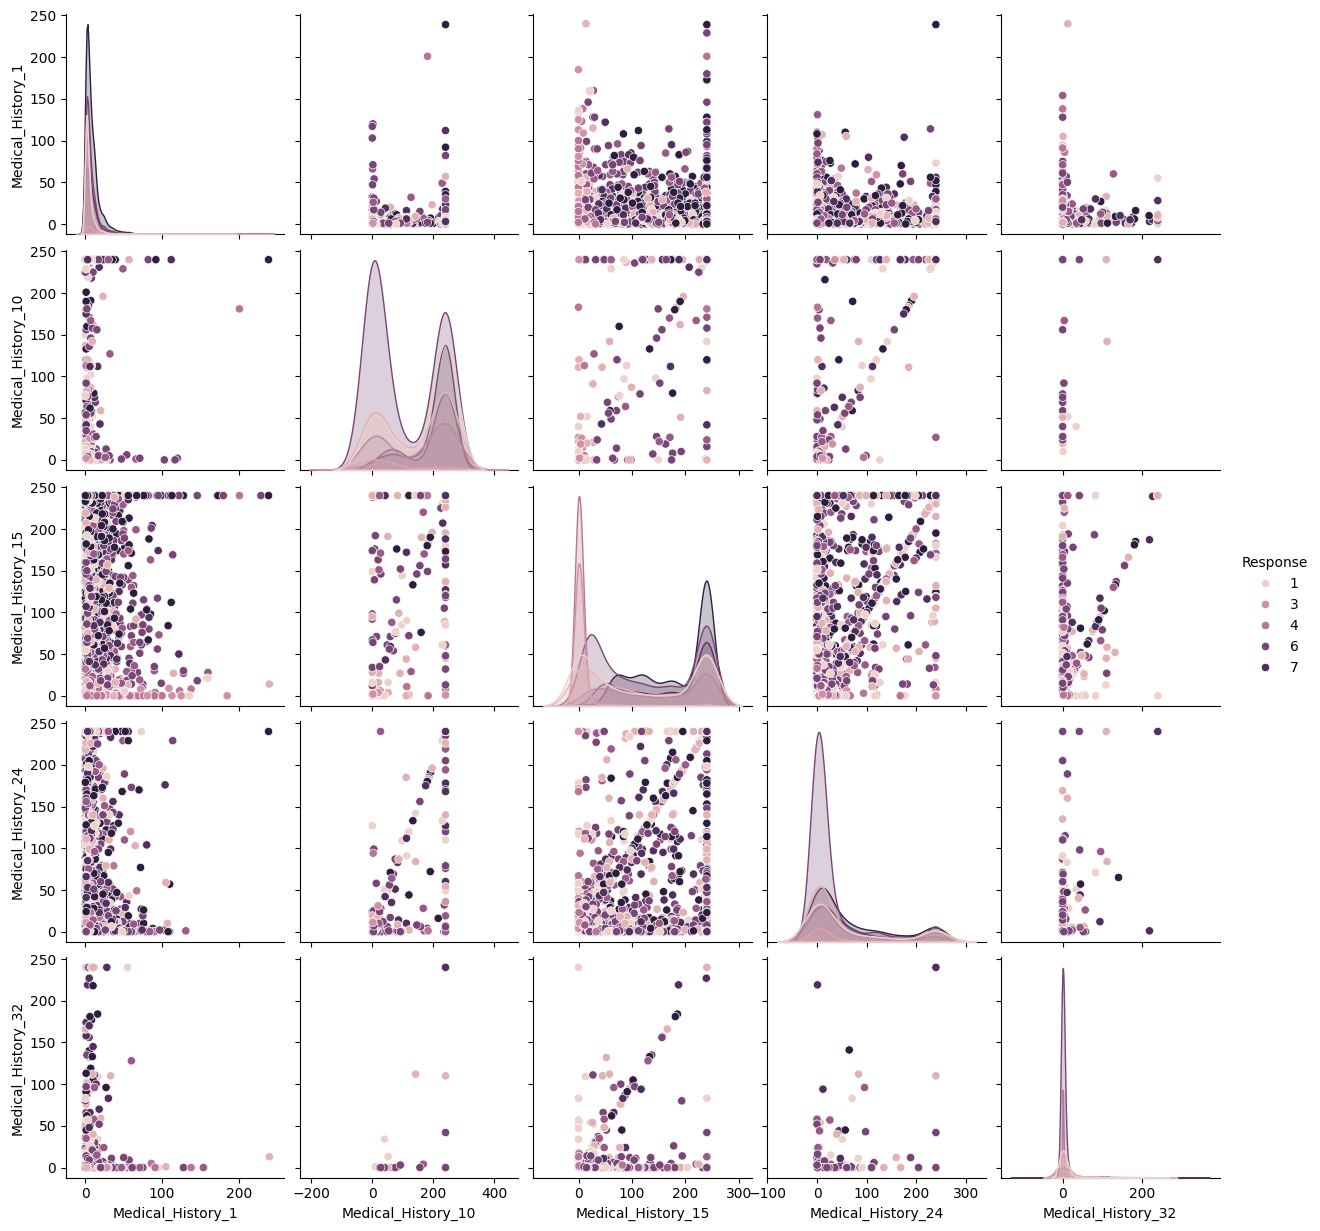

In [11]:
seaborn.pairplot(data, vars=discrete_features, hue='Response')

Графики выглядят еще менее информативно. Заметна тенденция, что пары признаков сконцентрированы либо на сторона квадрата [0, 240] x [0, 240], либо на его диагонали, то есть признаки как-то связаны.

##### Посмотрим на корреляции признаков, чтобы узнать, не нужно ли удалять какие-то признаки перед (гипотетическим) построением модели.

Для визуализации матрицы попарных корреляций удобно использовать функцию seaborn.heatmap, она автоматически подпишет признаки на осях и покажет colorbar. Мы вычисляем корреляции только между вещественными признаками, для целочисленных признаков корреляции вычисляется по другим формулам.

<Axes: >

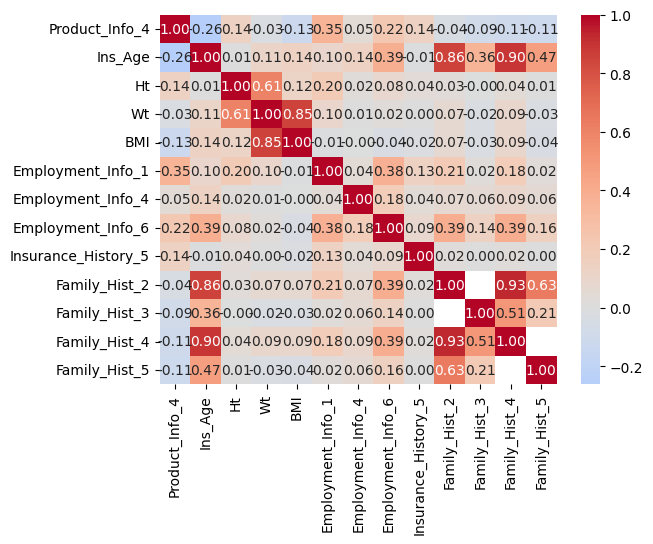

In [12]:
seaborn.heatmap(data[real_features].corr(), cmap='coolwarm', center=0, annot=True, fmt='.2f')

In [13]:
corr = data[real_features].corr()
mask = (corr != 1.0) & (corr > 0.9)
corr[mask].stack()

Family_Hist_2  Family_Hist_4    0.934615
Family_Hist_4  Family_Hist_2    0.934615
dtype: float64

__Ответьте на вопрос__:
* Есть ли пара (несовпадающих) признаков, корреляция между которыми больше 0.9 (можно проверить программно)? Если есть, то выпишите эту пару. Матрица корреляций симметрична, и дважды выписывать одну пару признаков не нужно.
    * Ответ: Family_Hist_2  Family_Hist_4    0.934615

Перейдем к визуализации категориальных признаков.

##### Посчитаем количество значений для каждого признака.
Строим много графиков вручную (а не с помощью готовой функции, как с hist или pairplot). Для этого создаем новую pyplot-фигуру, указываем, сколько графиков на ней будет, задаем размер; параметр sharey говорит не подписывать все оси отдельно, а подписать их только один раз слева; здесь это уместно, потому что масштабы всех счетчиков одни и те же.

В цикле по всем категориальным признакам строим countplot признака с помощью seaborn. Указываем параметр data, какой признак визуализировать, а также передаем ссылку на конкретную ячейку таблицы, в которой нужно изобразить график. Признаков всего 108, поэтому последние две ячейки таблицы графиков размером 11 x 10 останутся пустыми.

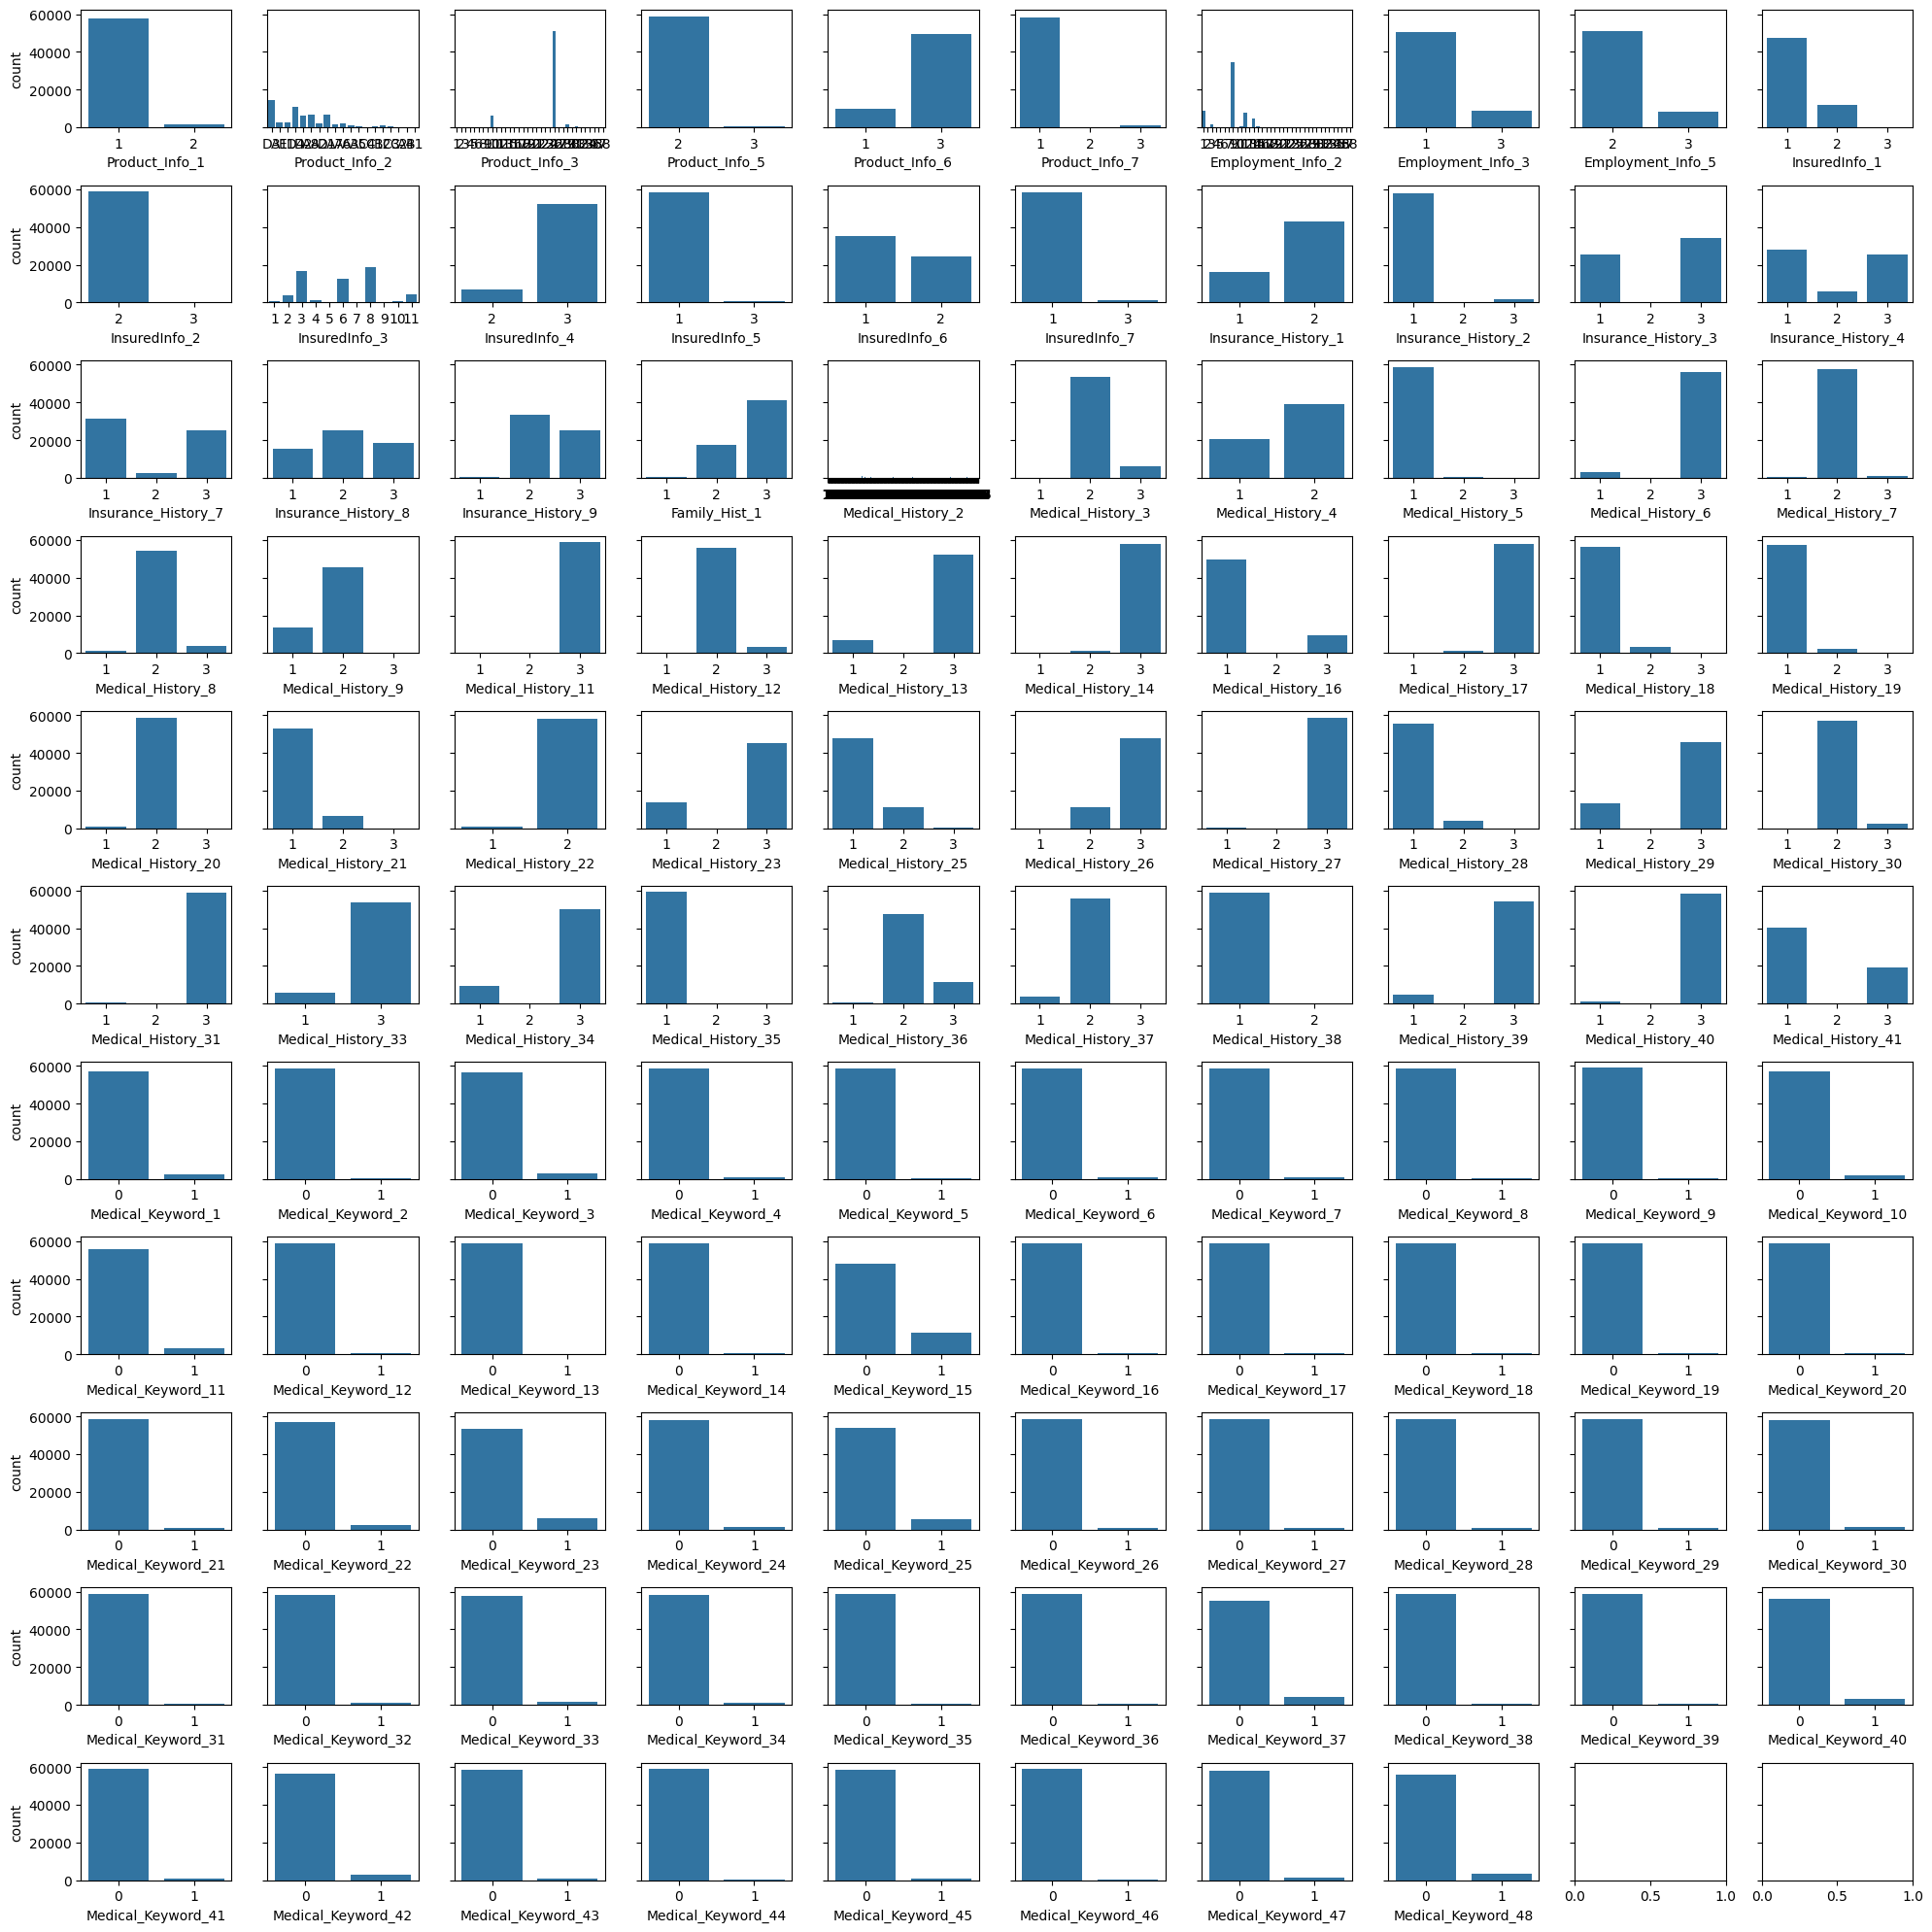

In [15]:
figure, axes= plt.subplots(11, 10, figsize=(20, 20), sharey=True)

for i in range(len(cat_features)):
    seaborn.countplot(data, x=cat_features[i], ax=axes[i // 10, i % 10])

figure.tight_layout()


In [21]:
for i, feat in enumerate(cat_features):
    print(feat)
    print(data[feat].value_counts())
    print()

Product_Info_1
Product_Info_1
1    57816
2     1565
Name: count, dtype: int64

Product_Info_2
Product_Info_2
D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: count, dtype: int64

Product_Info_3
Product_Info_3
26    50892
10     6008
29     1334
31      411
15      251
37      139
30       64
4        58
8        48
11       40
28       37
36       25
21       11
9        11
23       10
33        9
2         8
6         3
17        3
12        2
3         2
32        2
34        2
13        1
18        1
22        1
19        1
38        1
24        1
20        1
1         1
16        1
5         1
27        1
Name: count, dtype: int64

Product_Info_5
Product_Info_5
2    58968
3      413
Name: count, dtype: int64

Product_Info_6
Product_Info_6
3    49690
1     9691
Name: count, dtype: int64

Product_Info_

__Ответьте на вопросы (Блок 5)__:
* Есть ли среди категориальных признаков константные?
    * Ответ: Нет.
* Есть ли признаки с количеством возможных категорий (число значений признака) больше 5?
    * Ответ: Да.

У нас есть много признаков с сильными перекосами в сторону отдельного признака. Учитывая, что среди категориальных признаков много медицинских показателей, можно предположить, что именно эти признаки сильно влияют на увеличение риска (целевой признак). Проверить это предположение можно, построив такие же countplot с разбивкой каждого значения дополнительно по классам (то есть у нас будет несколько групп столбиков, и в каждой группе их будет 8). Это можно сделать, указав параметр hue в этой функции аналогично тому, как мы это делали выше.

Постройте графики countplot для признаков 'Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45' (признаки выбраны случайно) с разбивкой по классам.

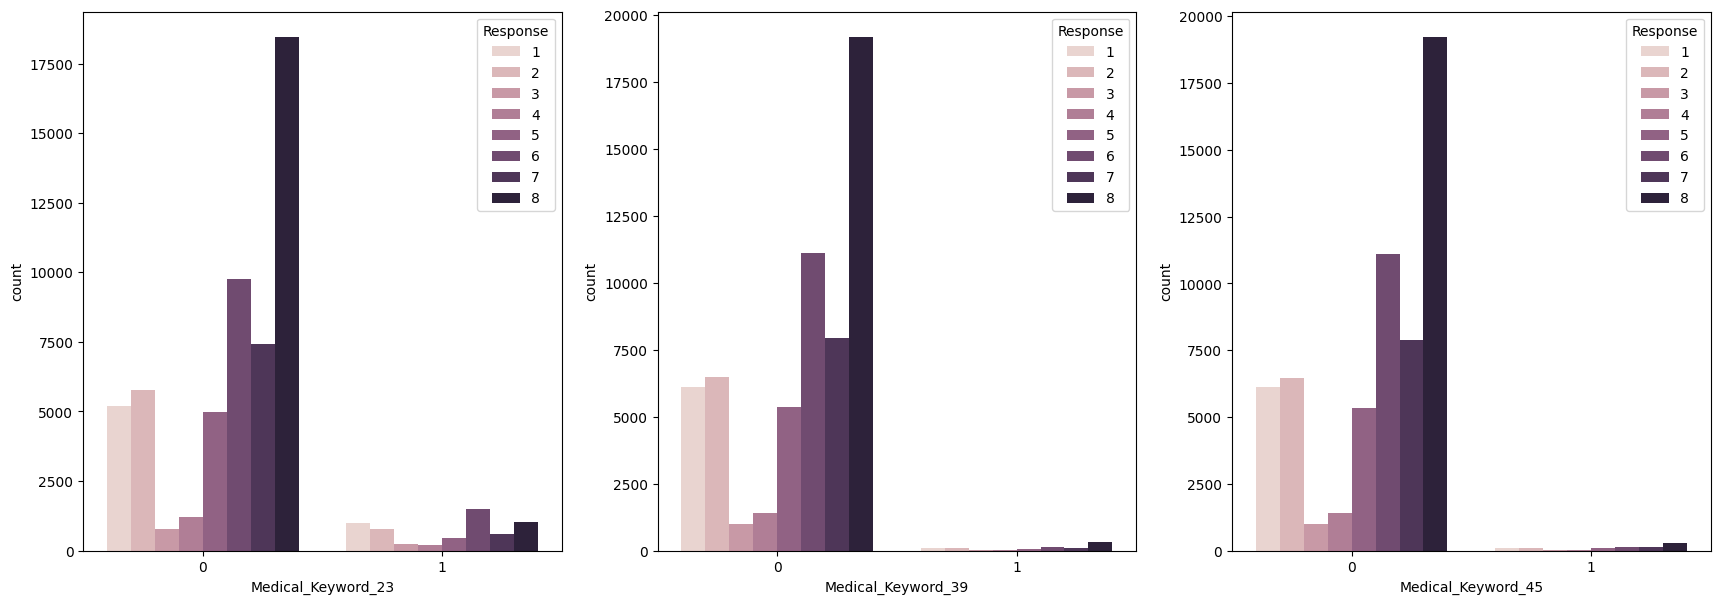

In [29]:
selected_features = ['Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45']
figure, axes= plt.subplots(1, 3, figsize=(21, 7))


for i, feature in enumerate(selected_features):
    seaborn.countplot(data, x=feature, hue='Response', ax=axes[i], legend='full')


__Ответьте на вопрос__:
* Наличие каких из этих трех факторов сильно повышает риск? Будем считать, что наличие признака сильно повышает риск, если количество человек, имеющих этот признак (то есть он для них равен 1) и отнесенных к категории риска 8, больше, чем такая же величина для любой другой категории риска.
* Ответ: не похоже, чтобы 23, 39 или 45-й медикал кейворд сильно повышал риски.

##### Наконец, посмотрим на распределение целевого признака, чтобы узнать, сбалансированы ли классы:

<Axes: xlabel='Response', ylabel='Count'>

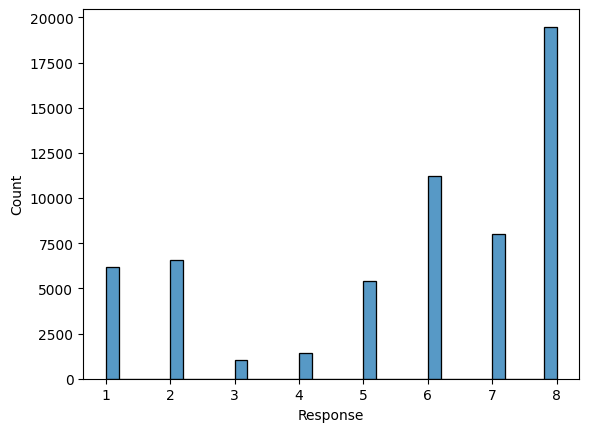

In [30]:
seaborn.histplot(data, x='Response')

### Визуализация с помощью понижения размерности

Далее можно воспользоваться средствами понижения размерности. Для задачи с дискретным целевым признаком это позволит понять, какие классы хорошо разделяются, а какие - нет.

Такие методы строят матрицу попарных расстояний между объектами, которая в случае, когда объектов много, будет занимать много памяти. Кроме того, отображать много точек на scatter plot (а именно его используют для визуализации результата понижения размерности) неудобно. Поэтому мы перемешаем выборку (и далее будем использовать ее).

In [31]:
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

In [32]:
sdata = shuffle(data, random_state=321)

Методы sklearn не принимают матрицы с пропусками (nan). Чтобы избежать этой проблемы, не будем рассматривать признаки, которые имеют много пропусков (последние четыре в списке вещественных признаков). Кроме того, ограничимся рассмотрением вещественных признаков.

В следующей ячейке отбираем нужные признаки, затем находим объекты, у которых все признаки известны (нет пропусков в выбранных признаках), а затем создаем отдельно матрицу объекты-признаки для работы методов понижения размерности и отдельно вектор правильных ответов на этих объектах: data_subset и response_subset. Кроме того, мы дополнительно стандартизуем нашу маленькую выборку, потому что методы понижения размерности очень чувствительны к разномасштабным данным (это отдельно указано в [туториале](http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling) в sklearn)

In [37]:
subset_l  = 1000
selected_features = real_features[:-4]
objects_with_nan = sdata.index[np.any(np.isnan(sdata[selected_features].values), axis=1)]
data_subset = scale(sdata[selected_features].drop(objects_with_nan, axis=0)[:subset_l])
response_subset = sdata["Response"].drop(objects_with_nan, axis=0)[:subset_l]

Будем строить визуализацию методами, разобранными на лекции: t-SNE, U-Map и MDS.

In [41]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.

Методы понижения размерности имеют такой же интерфейс, как классификаторы и регрессоры. Для построения визуализации t-SNE нужно создать объект класса и вызвать его метод fit_transform, который вернет матрицу размера число объектов x новая размерность; по умолчанию новая размерность равна 2. Выполните эти действия и запишите результат работы метода в переменную tsne_representation. Рекомендуем ознакомиться с параметрами метода на [странице документации TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE). <font color="red"> Зафиксируйте случайное приближение random_state=321, чтобы результат визуализации у всех был одинаковый. </font>

In [71]:
# Код 4. Присвойте переменной tsne_representation результат понижения размерности методом tSNE с параметрами по умолчанию
tsne_representation = TSNE(random_state=321, n_jobs=-1).fit_transform(data_subset)
tsne_representation

array([[ 13.651519  ,  -5.9578905 ],
       [ 21.938173  , -12.459636  ],
       [ 20.326977  ,   5.9807158 ],
       ...,
       [ -5.87318   , -27.30317   ],
       [ 12.121319  , -27.468779  ],
       [ -0.98423463,  -1.8752006 ]], dtype=float32)

Визуализируем полученное представление. Для этого создадим набор цветов по количеству классов, а затем в цикле по классам будем отображать представления точек, относящихся к этому классу. Будем указывать параметр alpha=0.5, чтобы сделать точки полупрозрачными, это лучше в ситуации, когда точки накладываются.

/tmp/ipykernel_36339/2017096455.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  seaborn.scatterplot(x=tsne_representation[:, 0], y=tsne_representation[:, 1], hue=response_subset, palette=cm.get_cmap('rainbow', 8), legend='full', alpha=0.5)


<Axes: >

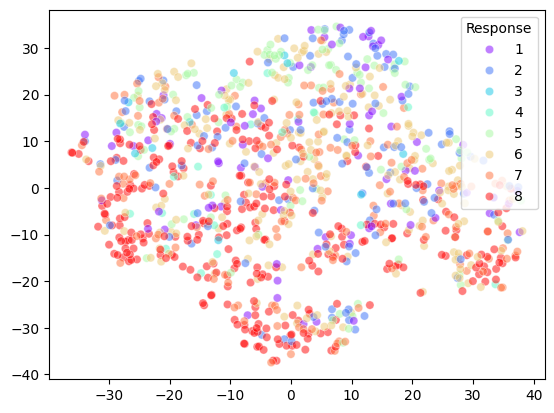

In [72]:
seaborn.scatterplot(x=tsne_representation[:, 0], y=tsne_representation[:, 1], hue=response_subset, palette=cm.get_cmap('rainbow', 8), legend='full', alpha=0.5)

Теперь сделаем то же с MDS.

In [74]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

In [75]:
# Код 5. Присвойте переменной MDS_transformed результат понижения размерности методом MDS с параметрами по умолчанию
# Не забудьте зафиксировать random_state=321
mds_transformed= MDS(random_state=321, n_jobs=-1).fit_transform(data_subset)

/tmp/ipykernel_36339/2187123995.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  seaborn.scatterplot(x=mds_transformed[:, 0], y=mds_transformed[:, 1], hue=response_subset, palette=cm.get_cmap('rainbow', 8), legend='full', alpha=0.5)


<Axes: >

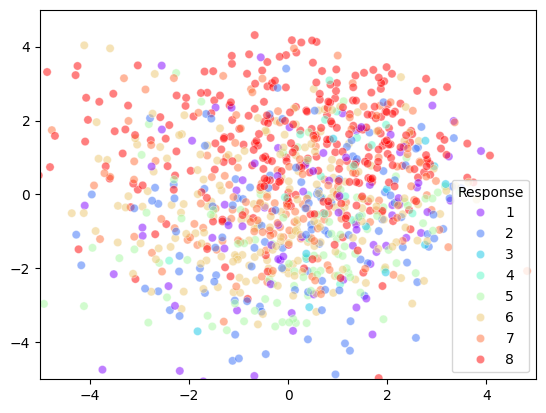

In [79]:

plt.xlim(-5, 5)   # масса точек концентрируется в этом масштабе
plt.ylim(-5, 5)   # рекомендуем сначала отобразить визуализацию целиком, а затем раскомментировать эти строки.

seaborn.scatterplot(x=mds_transformed[:, 0], y=mds_transformed[:, 1], hue=response_subset, palette=cm.get_cmap('rainbow', 8), legend='full', alpha=0.5)

Для построения представления можно пробовать разные метрики, их список доступен в [документации scipy](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) (потому что sklearn использует метрики scipy). Вы можете попробовать использовать разные метрики в t-SNE и MDS и смотреть получающиеся визуализации.

В t_SNE метрику можно указать при создании объекта класса TSNE, в MDS это реализуется несколько сложнее. Нужно указать dissimilarity="precomputed", а в fit_transform подать не матрицу объектов, а матрицу попарных расстояний между объектами. Создать ее можно с помощью функции pairwise_distances с параметрами: матрица объектов, метрика.

In [ ]:
# pairwise_distances(data_subset, metric='cosine').shape
# data_subset.shape

(1000, 9)

In [87]:
# Код 6. Присвойте переменной MDS_transformed_cos результат понижения размерности методом MDS с косинусной метрикой

mds_transformed_cos = MDS(random_state=321, dissimilarity='precomputed', n_jobs=-1).fit_transform(pairwise_distances(data_subset, metric='cosine'))

/tmp/ipykernel_36339/1984649197.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  seaborn.scatterplot(x=mds_transformed_cos[:, 0], y=mds_transformed_cos[:, 1], hue=response_subset, palette=cm.get_cmap('rainbow', 8), legend='full', alpha=0.5)


<Axes: >

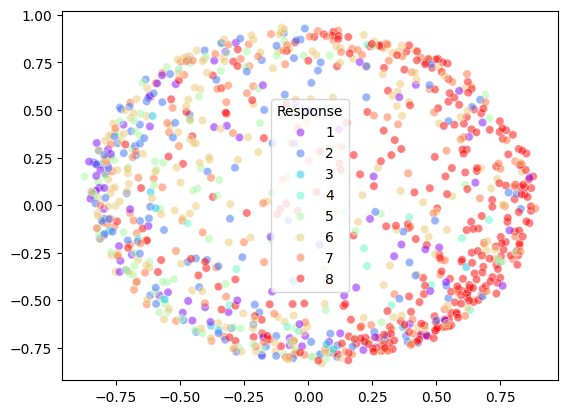

In [88]:
seaborn.scatterplot(x=mds_transformed_cos[:, 0], y=mds_transformed_cos[:, 1], hue=response_subset, palette=cm.get_cmap('rainbow', 8), legend='full', alpha=0.5)

__Ответьте на вопросы:__ Будем нумеровать визуализации от 1 до 3: tSNE, MDS по умолчанию, MDS с косинусной метрикой.
* Есть ли визуализация, на которой классы хорошо разделяются? Классы хорошо разделяются, если между облаками точек разных классов можно проводить границы. Если есть, укажите хотя бы одну такую визуализацию.
    * Ответ: нет.
* Есть ли визуализации, по которым видно, что объекты с наименьшим риском (1 и 2) отличаются от объектов с высоким риском (7 и 8)? Будем считать, что объекты классов A и B отличаются, если можно выделить область плоскости, в которой в целом больше точек класса A, и можно выделить область, в которой больше точек класса B. Если есть, укажите хотя бы одну такую визуализацию.
    * Ответ: на всех трёх есть такая картина. На первом графике внизу расположены объекты с высоким риском, наверху с маленьким, на втором графике — наоборот, на третьем графике высокий риск справа, низкий — слева.
* Есть ли визуализации, на которым видны отдельно стоящие (от общего облака) точки? Если есть, укажите хотя бы одну такую визуализацию.
    * Ответ: на второй такое есть.

Визуализации разными методами достаточно сильно отличаются, но на каждой можно условно выделить направление, вдоль которого происходит увеличение риска от 1 до 8 (то есть точки постепенно меняют цвет). Если бы это не выполнялось, можно было бы предположить, что задача не решаема.

Теперь то же самое для U-Map

In [92]:
# https://umap-learn.readthedocs.io/en/latest/
# !pip install umap-learn
# import umap
# reducer = umap.UMAP()
# у этой библиотеки траблы с современной версией питона, я решил не ставить её

### Поиск аномалий

Воспользуемся методами поиска аномалий, рассмотренными в лекции.

##### One class SVM
Для простоты выберем вещественные признаки, которые известны для всех объектов: Product_Info_4, Ins_Age, Ht, Wt, BMI. Оставим только те, которые относятся к человеку, то есть не будем рассматривать Product_Info_4. Получится, что мы отбираем нестандартных по комбинации вес/рост/возраст людей.

In [93]:
from sklearn import svm

In [94]:
person_features = ["Ins_Age", "Ht", "Wt", "BMI"]

Два ключевых параметра OC_SVM - gamma и nu. Первый влияет на то, как хорошо граница будет приближать данные, второй - сколько точек нужно относить к выбросам. Вы можете попробовать разные значения, в том числе, значения по умолчанию, и убедиться, что при них алгоритм работает не очень адекватно. Запустите следующую ячейку, на ее выполнение может понадобиться некоторое время.

In [95]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.01)
svm_.fit(sdata[person_features])

labels = svm_.predict(sdata[person_features])

(labels==1).mean()

np.float64(0.9899631195163436)

У вас должно получиться, что около 98% объектов не признаются выбросами.

Попытаемся визуализировать, какие объекты отнесены к шумовым. Для этого нужно построить scatter-графики для каждой пары признаков в person_features (всего 6 графиков). На каждом графике нужно отдельно отобразить точки с labels==1 и labels==-1.

Создайте pyplot-фигуру с 6 графиками: 2 x 3, укажите размер фигуры (12, 8). Затем в цикле по __парам признаков__ из person_features отобразите scatter-графики точек (сделайте точки с разными labels разных цветов: синие, c="blue", - обычные точки, у которых labels==1, красные, c="red",  - шумовые, у которых labels==-1.) Для построения графика можно пользоваться командой axes[...].scatter(...), вместо ... - ваш код. Функция scatter принимает две вектора одинаковой длины, абсциссы и ординаты точек, и дополнительные параметры, например, цвет c и коэффициент прозрачности точек alpha. Подпишите оси названиями признаков, это можно сделать с помощью команды axes[...].set_xlabel(...) или axes[...].ylabel(...).

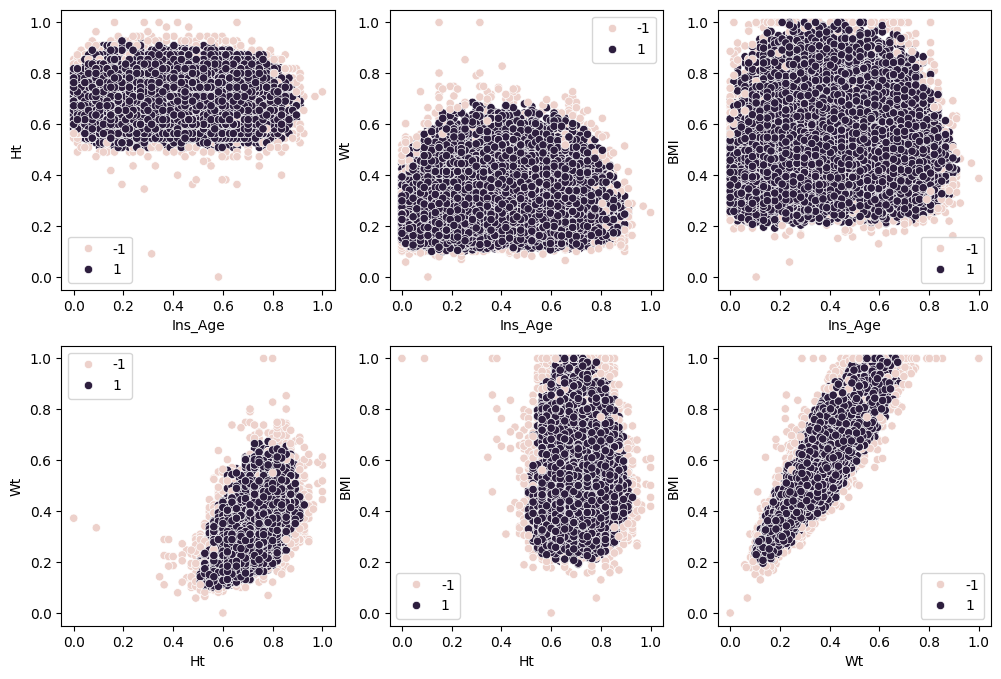

In [115]:
# Код 7. Постройте 6 графиков
sdata[person_features]
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs_i = 0
for i in range(len(person_features)):
    for j in range(i + 1, len(person_features)):
        seaborn.scatterplot(x=person_features[i], y=person_features[j], hue=labels, data=sdata, ax=axs[axs_i // 3, axs_i % 3])
        axs_i += 1


Вы должны увидеть, что, во-первых, облака синие точки заполняют почти все облако точек, а во-вторых, красные точки находятся на границе или далеко от облака (интуитивно понятно, что это аномальные объекты).

##### Непараметрическое восстановление плотности.
Искать аномалии можно, анализируя непараметрически восстановленную плотность одномерного распределения. Так можно заметить, что какие-то объекты выбиваются из общей тенденции.

В seaborn это удобно делать с помощью метода displot. Посмотрев на гистограммы в начале ноутбука, выберем для ближайшего рассмотрения признаки BMI, Employment_Info_1, Medical_History_32.

Примените метод distplot к этим трем признакам, указав bins=50. Рекомендуется удалять значения nan с помощью метода датафрейма .dropna().

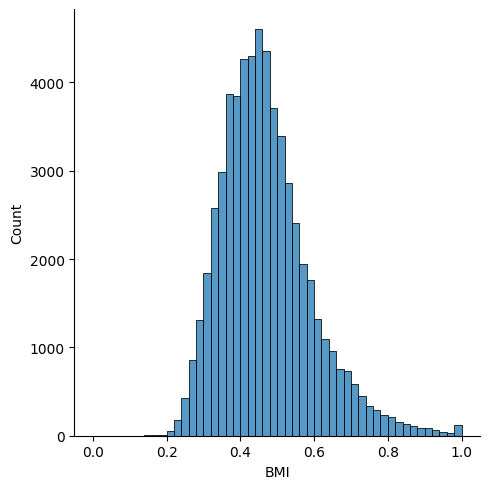

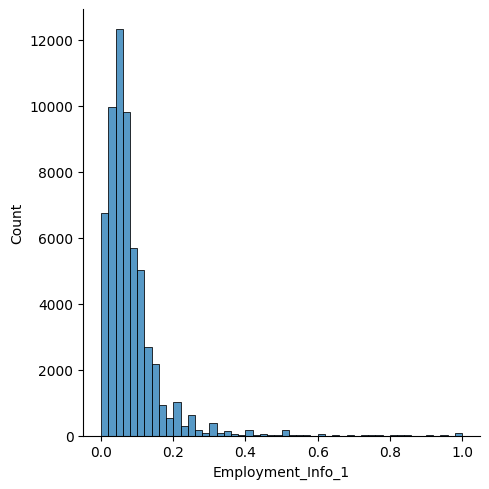

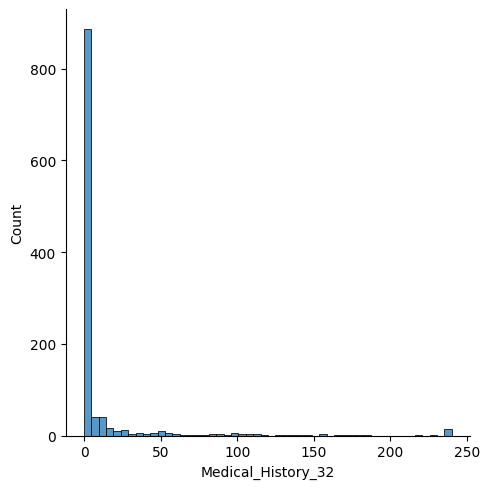

In [142]:
# Код 8. Восстановите плотности для трех указанных признаков
displot_features = ['BMI', 'Employment_Info_1', 'Medical_History_32']


for i, feature in enumerate(displot_features):
    seaborn.displot(sdata[feature].dropna(), bins=50)



На трех графиках видно, что в конце множества значений признака есть скачок, и это явление очень похоже на аномалию.